In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt

In [282]:
df_churn = pd.read_csv('../data/Churn.csv', sep=';')
print(f'linhas: {df_churn.shape[0]}\ncolunas: {df_churn.shape[1]}')
df_churn.head(20)

linhas: 999
colunas: 12


,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,1.013489e+07,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,1.125426e+07,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,1.139316e+07,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9.382663e+06,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,7.908410e+05,0
5,6,645,SC,Masculino,44,8,11375578,2,1,0,1.497567e+07,1
6,7,822,RS,M,50,7,0,2,1,1,1.006280e+05,0
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
8,9,501,RS,Masculino,44,4,14205107,2,0,1,7.494050e+05,0
9,10,684,RS,Masculino,27,2,13460388,1,1,1,7.172573e+06,0


renomeando as colunas

In [283]:
#renomeando colunas
df_churn.columns = ["id", "score", "estado", "genero", "idade", "patrimonio", "saldo", "produtos", "tem_cart_credito", "ativo", "salario", "saiu"]

In [284]:
#verificação de mudança no nome das colunas
df_churn.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cart_credito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


## Analise Exploratoria

Dados Qualitativos (categoricos):
- estado
- genero
- saiu
(saiu entrou nos categoricos mesmo recebendo valores numericos por se tratar um valor boleano)

In [285]:
estado_agrupado = df_churn.groupby(['estado']).size()
estado_agrupado

estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'PR'),
  Text(1, 0, 'RP'),
  Text(2, 0, 'RS'),
  Text(3, 0, 'SC'),
  Text(4, 0, 'SP'),
  Text(5, 0, 'TD')])

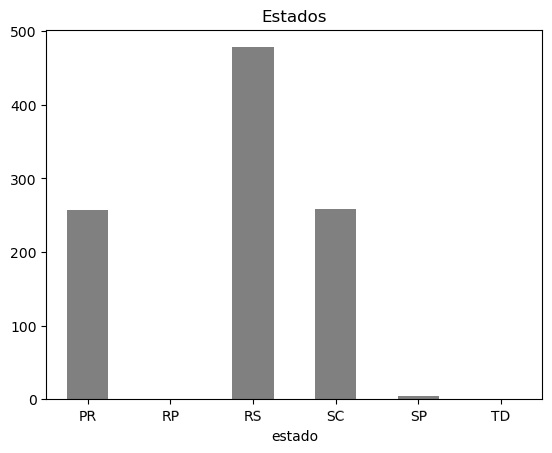

In [286]:
estado_agrupado.plot.bar(color='gray')
plt.title("Estados")
plt.xticks(rotation=1)

In [287]:
agrupamento_genero = df_churn.groupby(['genero']).size()
agrupamento_genero

genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'F'),
  Text(1, 0, 'Fem'),
  Text(2, 0, 'Feminino'),
  Text(3, 0, 'M'),
  Text(4, 0, 'Masculino')])

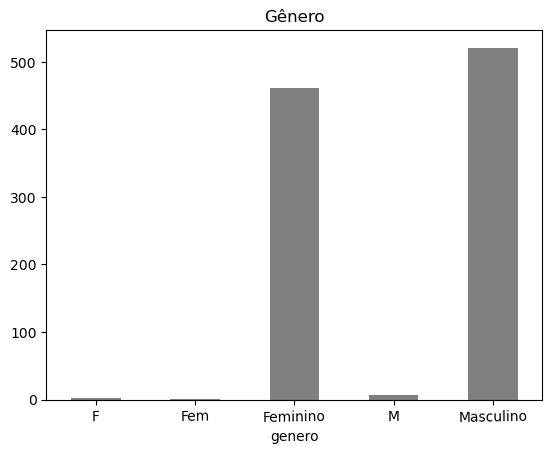

In [288]:
agrupamento_genero.plot.bar(color='gray')
plt.title("Gênero")
plt.xticks(rotation=1)

In [289]:
agrupado_saiu = df_churn.groupby(['saiu']).size()
agrupado_saiu

saiu
0    796
1    203
dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

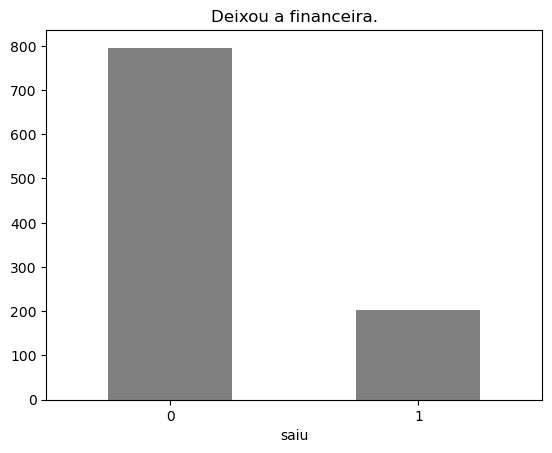

In [290]:
agrupado_saiu.plot.bar(color='gray')
plt.title("Deixou a financeira.")
plt.xticks(rotation=1)


- o valor de 0 representa false
- o valor de 1 representa true

Dados Numéricos
- score
- idade
- patrimonio
- saldo
- produtos
- tem_cart_credito
- salario

In [291]:
#coluna score
df_churn['score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Boxplot de Score')

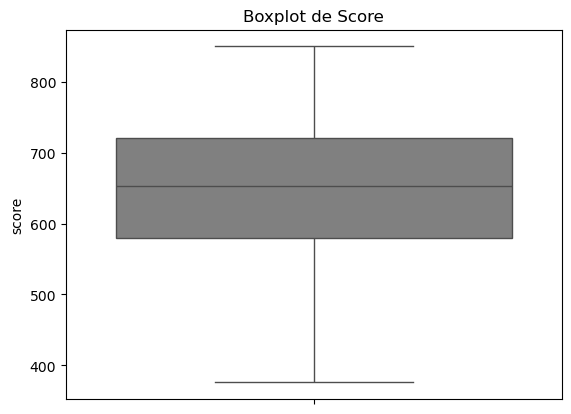

In [292]:
sns.boxplot(df_churn['score'], color='gray')
plt.title('Boxplot de Score')

Text(0.5, 1.0, 'Histplot de score com kde')

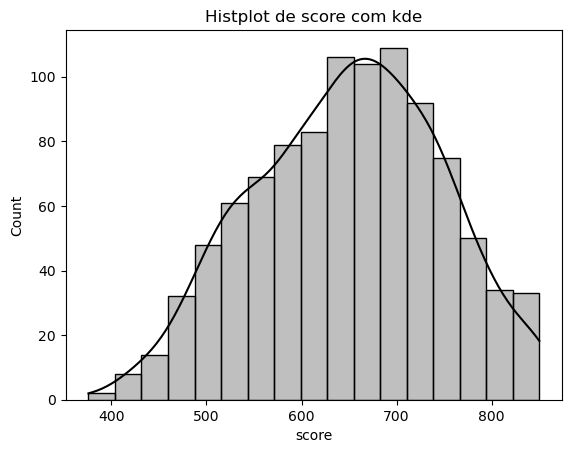

In [293]:
sns.histplot(df_churn['score'], kde=True, color='gray').lines[0].set_color('black')
plt.title('Histplot de score com kde')

aparentemente não tem problema algum com o score que necessite de algum cuidado especifico.
Média: 648.62
Mediana: 653.00

In [294]:
#idade
df_churn['idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

A média de idade é 38, a mediana é 37, porém foi notado que a menor idade é -20 e a maior é 140, a idade vai precisar de um tratamento.

Text(0.5, 1.0, 'Boxplot de Idade')

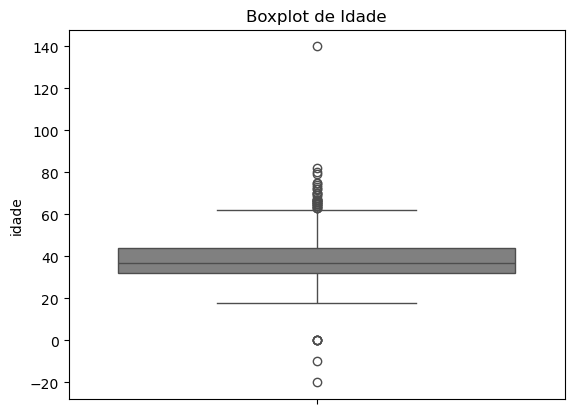

In [295]:
sns.boxplot(df_churn['idade'], color='gray')
plt.title('Boxplot de Idade')

Text(0.5, 1.0, 'Histplo de Idade')

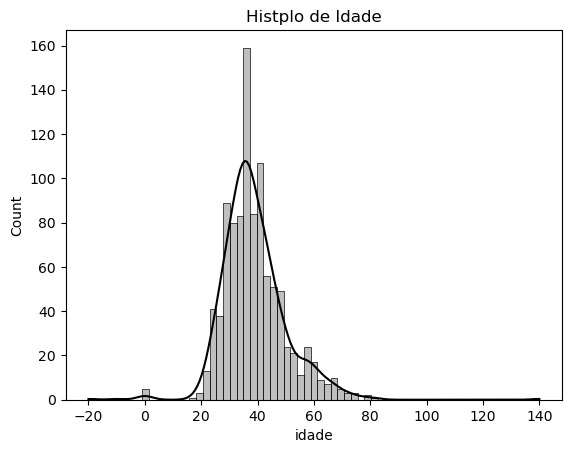

In [296]:
sns.histplot(df_churn['idade'], color='gray', kde=True).lines[0].set_color('black')
plt.title('Histplo de Idade')

In [297]:
#saldo
df_churn['saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: saldo, dtype: float64

Text(0.5, 1.0, 'Boxplot de Saldo')

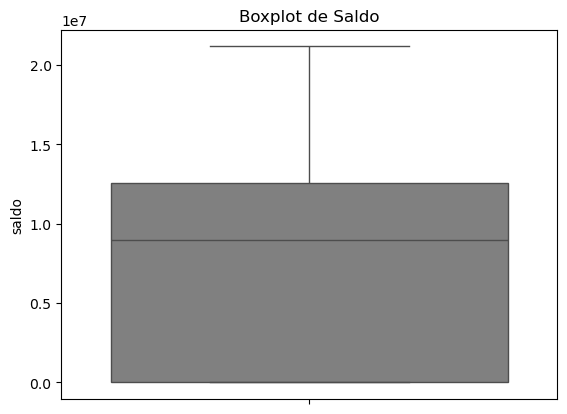

In [298]:
sns.boxplot(df_churn['saldo'], color="gray")
plt.title("Boxplot de Saldo")

Text(0.5, 1.0, 'Histplot do saldo')

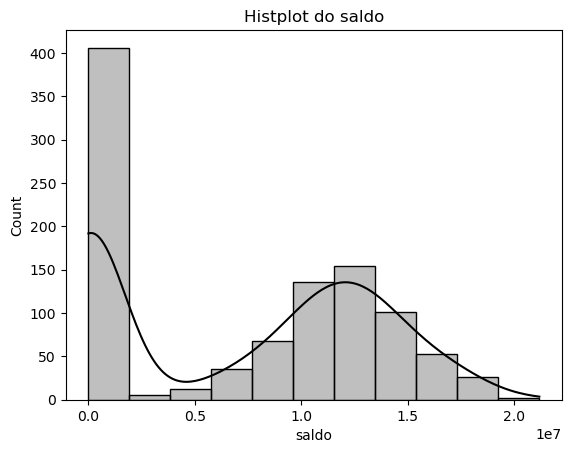

In [299]:
sns.histplot(df_churn['saldo'], color='gray', kde=True).lines[0].set_color('black')
plt.title("Histplot do saldo")

valores de 0 influenciam na tomada de decisão pois existem pessoas com saldo 0, não haverá modificação nesses dados

In [300]:
#salario
df_churn['salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64

existe algo de estranho na questão do salario, a media é de 3.528762e+07 e a mediana  8.703250e+06

Text(0.5, 1.0, 'Boxplot de Salário')

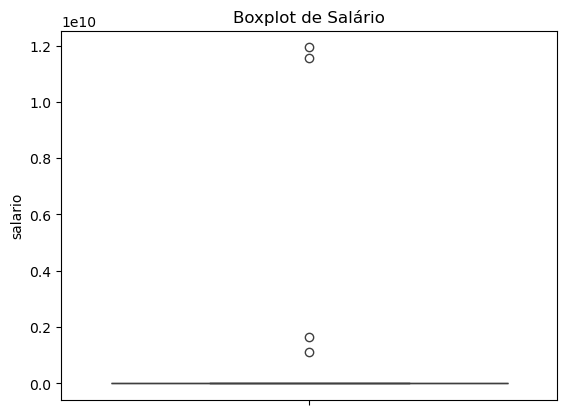

In [301]:
sns.boxplot(df_churn['salario'])
plt.title("Boxplot de Salário")

Text(0.5, 1.0, 'Histplot de Salário')

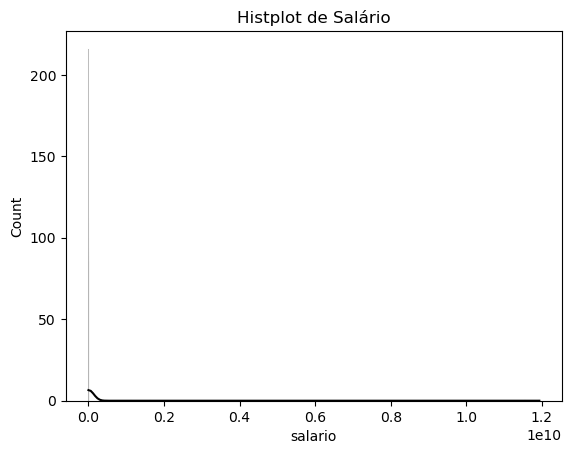

In [302]:
sns.histplot(df_churn['salario'], color='gray', kde=True).lines[0].set_color('black')
plt.title('Histplot de Salário')

contagem de NaN

In [303]:
df_churn.isna().sum()

id                  0
score               0
estado              0
genero              8
idade               0
patrimonio          0
saldo               0
produtos            0
tem_cart_credito    0
ativo               0
salario             7
saiu                0
dtype: int64

In [304]:
df_churn[df_churn.duplicated(keep=False)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cart_credito,ativo,salario,saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


## Tratamento

trocando os valores errados de estado usando a moda

In [305]:
df_churn.loc[df_churn['estado'].isin(['RP', 'SP', 'TD']), 'estado'] = 'RS'
estado_agrupado = df_churn.groupby(['estado']).size()
estado_agrupado

estado
PR    257
RS    484
SC    258
dtype: int64

arrumando os valores de gênero Fem, F para Feminino e M para Masculino 

In [306]:
df_churn.loc[df_churn['genero'].isin(['Fem', 'F']), 'genero'] = 'Feminino'
df_churn.loc[df_churn['genero']== 'M', 'genero'] = 'Masculino'
agrupamento_genero = df_churn.groupby(['genero']).size()
agrupamento_genero

genero
Feminino     464
Masculino    527
dtype: int64

preenchimento de NaN de genero e de salario

In [307]:
df_churn['genero'].isna().sum()

8

In [308]:
df_churn.fillna({'genero':'Masculino'}, inplace=True)
agrupamento_genero = df_churn.groupby(['genero']).size()
agrupamento_genero

genero
Feminino     464
Masculino    535
dtype: int64

In [309]:
df_churn['genero'].isna().sum()

0

agora é a vez de salário usando a mediana

In [310]:
df_churn['salario'].isna().sum()

7

In [311]:
df_churn.fillna({'salario': sts.median(df_churn['salario'])}, inplace=True)

In [312]:
df_churn['salario'].isna().sum()


0

idade:

In [313]:
df_churn.loc[(df_churn['idade']< 0 ) | (df_churn['idade'] > 100), 'idade']

867    -10
984    -20
990    140
Name: idade, dtype: int64

In [314]:
df_churn.loc[(df_churn['idade']< 0 ) | (df_churn['idade'] > 100), 'idade'] = sts.median(df_churn['idade'])

In [315]:
df_churn.loc[(df_churn['idade']< 0 ) | (df_churn['idade'] > 100), 'idade']

Series([], Name: idade, dtype: int64)

drop de duplicatas

In [316]:
df_churn = df_churn.drop_duplicates(subset='id', keep='first')

In [317]:
df_churn[df_churn.duplicated(keep=False)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cart_credito,ativo,salario,saiu


outliers de salario

In [318]:
#considerando 2 desvios padrão
desvio_padrao = sts.stdev(df_churn['salario'])
desvio_padrao

528988918.4679201

In [319]:
#checagem de criterios
df_churn.loc[df_churn['salario'] >= 2* desvio_padrao]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cart_credito,ativo,salario,saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [320]:
#atribuição de médiana
df_churn.loc[df_churn['salario'] >= 2* desvio_padrao, 'salario'] = sts.median(df_churn['salario'])

In [321]:
#verificação de mudanças
df_churn.loc[df_churn['salario'] >= 2* desvio_padrao]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cart_credito,ativo,salario,saiu


In [322]:
df_churn.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cart_credito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [323]:
print(f'linhas: {df_churn.shape[0]}\ncolunas: {df_churn.shape[1]}')

linhas: 998
colunas: 12
